In [1]:
import mediapipe as mp
import cv2
import numpy as np
import os
import csv

In [56]:
mp_hand = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
Hands = mp_hand.Hands(static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.8) 

In [57]:
##create column
hand_csv = []
for i in mp_hand.HandLandmark:
    for j in ['x','y','z']:
        hand_csv.append(str(i)+f'.{j}')
hand_csv.append('label')

## Write CSV
with open('handposition.csv', 'w', newline='') as csvfile:
    csvWriter = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csvWriter.writerow(hand_csv)

In [58]:
# hand_csv

In [62]:
# class love rock hi ok
class_name = 'Ok'

cap = cv2.VideoCapture(1)

while cap.isOpened:
    
    ret,frame = cap.read()
    
    results = Hands.process(frame)
    if results.multi_hand_landmarks:
        for result in results.multi_hand_landmarks:
            mp_draw.draw_landmarks(frame,result,mp_hand.HAND_CONNECTIONS,
                                   mp_draw.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5))
            
#             print(result.landmark)
            try:
                hand_pos = list(np.array([[i.x,i.y,i.z] for i in result.landmark]).flatten())
                hand_pos.append(class_name)
                with open('handposition.csv', 'a', newline='') as csvfile:
                    csvWriter = csv.writer(csvfile, delimiter=',',quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csvWriter.writerow(hand_pos)
            except:
                pass
            
        
    cv2.imshow("Hand detect",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hand_position.csv')
df.head()

,HandLandmark.WRIST.x,HandLandmark.WRIST.y,HandLandmark.WRIST.z,HandLandmark.THUMB_CMC.x,HandLandmark.THUMB_CMC.y,HandLandmark.THUMB_CMC.z,HandLandmark.THUMB_MCP.x,HandLandmark.THUMB_MCP.y,HandLandmark.THUMB_MCP.z,HandLandmark.THUMB_IP.x,...,HandLandmark.PINKY_PIP.x,HandLandmark.PINKY_PIP.y,HandLandmark.PINKY_PIP.z,HandLandmark.PINKY_DIP.x,HandLandmark.PINKY_DIP.y,HandLandmark.PINKY_DIP.z,HandLandmark.PINKY_TIP.x,HandLandmark.PINKY_TIP.y,HandLandmark.PINKY_TIP.z,label
0,0.256099,0.420765,0.000044,0.296350,0.442285,-0.064373,0.348611,0.439393,-0.086053,0.393356,...,0.276003,0.258556,-0.020569,0.265943,0.243915,-0.035656,0.267173,0.233770,-0.041835,Love
1,0.240134,0.422151,0.000017,0.285177,0.446900,-0.062033,0.339525,0.443489,-0.081400,0.384087,...,0.264661,0.255264,-0.027908,0.258578,0.232153,-0.042630,0.262323,0.214546,-0.050565,Love
2,0.229449,0.432021,0.000018,0.275363,0.454199,-0.061544,0.335400,0.438834,-0.077577,0.382621,...,0.242746,0.257835,-0.044273,0.237496,0.217383,-0.068270,0.243289,0.177703,-0.084648,Love
3,0.214533,0.436162,-0.000006,0.262787,0.465176,-0.068112,0.329432,0.446878,-0.082490,0.380779,...,0.223546,0.249586,-0.049524,0.217837,0.206545,-0.077504,0.224142,0.163176,-0.096829,Love
4,0.208553,0.453738,0.000028,0.260532,0.476876,-0.071724,0.330442,0.449895,-0.086634,0.385202,...,0.203895,0.248958,-0.057143,0.197402,0.205969,-0.086079,0.203507,0.161974,-0.103564,Love


In [38]:
df.tail()

,HandLandmark.WRIST.x,HandLandmark.WRIST.y,HandLandmark.WRIST.z,HandLandmark.THUMB_CMC.x,HandLandmark.THUMB_CMC.y,HandLandmark.THUMB_CMC.z,HandLandmark.THUMB_MCP.x,HandLandmark.THUMB_MCP.y,HandLandmark.THUMB_MCP.z,HandLandmark.THUMB_IP.x,...,HandLandmark.PINKY_PIP.x,HandLandmark.PINKY_PIP.y,HandLandmark.PINKY_PIP.z,HandLandmark.PINKY_DIP.x,HandLandmark.PINKY_DIP.y,HandLandmark.PINKY_DIP.z,HandLandmark.PINKY_TIP.x,HandLandmark.PINKY_TIP.y,HandLandmark.PINKY_TIP.z,label
246,0.268200,0.695210,-0.000044,0.347345,0.676226,-0.033893,0.425650,0.643760,-0.070240,0.480651,...,0.280932,0.337903,-0.069597,0.272444,0.280713,-0.065471,0.262981,0.224025,-0.059200,Ok
247,0.267780,0.697160,-0.000050,0.346829,0.677506,-0.033131,0.424763,0.643551,-0.068829,0.479175,...,0.281767,0.339126,-0.064100,0.273290,0.281809,-0.058941,0.263442,0.225122,-0.051746,Ok
248,0.267745,0.695937,-0.000053,0.345343,0.677443,-0.039887,0.423020,0.644392,-0.079067,0.476823,...,0.282555,0.339702,-0.060127,0.273066,0.284374,-0.053717,0.262393,0.229710,-0.045650,Ok
249,0.269233,0.695027,-0.000051,0.347224,0.678979,-0.035642,0.424287,0.648149,-0.070840,0.477064,...,0.283792,0.337861,-0.053017,0.273897,0.281737,-0.045639,0.263506,0.226358,-0.037705,Ok
250,0.271207,0.695145,-0.000053,0.349485,0.677072,-0.039146,0.426645,0.644688,-0.076998,0.479468,...,0.283173,0.337477,-0.060297,0.274267,0.280954,-0.054060,0.264908,0.225000,-0.046774,Ok


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

# encoder = LabelEncoder()
# label_encodered = encoder.fit_transform(df['label'])
# print(encoder.classes_)
# # dclipconcat()
# df = pd.concat([df,pd.Series(label_encodered)],axis=1)

In [40]:
# df.rename(index=str,columns={0:'Label'},inplace=True)

In [41]:
df.head()

,HandLandmark.WRIST.x,HandLandmark.WRIST.y,HandLandmark.WRIST.z,HandLandmark.THUMB_CMC.x,HandLandmark.THUMB_CMC.y,HandLandmark.THUMB_CMC.z,HandLandmark.THUMB_MCP.x,HandLandmark.THUMB_MCP.y,HandLandmark.THUMB_MCP.z,HandLandmark.THUMB_IP.x,...,HandLandmark.PINKY_PIP.x,HandLandmark.PINKY_PIP.y,HandLandmark.PINKY_PIP.z,HandLandmark.PINKY_DIP.x,HandLandmark.PINKY_DIP.y,HandLandmark.PINKY_DIP.z,HandLandmark.PINKY_TIP.x,HandLandmark.PINKY_TIP.y,HandLandmark.PINKY_TIP.z,label
0,0.256099,0.420765,0.000044,0.296350,0.442285,-0.064373,0.348611,0.439393,-0.086053,0.393356,...,0.276003,0.258556,-0.020569,0.265943,0.243915,-0.035656,0.267173,0.233770,-0.041835,Love
1,0.240134,0.422151,0.000017,0.285177,0.446900,-0.062033,0.339525,0.443489,-0.081400,0.384087,...,0.264661,0.255264,-0.027908,0.258578,0.232153,-0.042630,0.262323,0.214546,-0.050565,Love
2,0.229449,0.432021,0.000018,0.275363,0.454199,-0.061544,0.335400,0.438834,-0.077577,0.382621,...,0.242746,0.257835,-0.044273,0.237496,0.217383,-0.068270,0.243289,0.177703,-0.084648,Love
3,0.214533,0.436162,-0.000006,0.262787,0.465176,-0.068112,0.329432,0.446878,-0.082490,0.380779,...,0.223546,0.249586,-0.049524,0.217837,0.206545,-0.077504,0.224142,0.163176,-0.096829,Love
4,0.208553,0.453738,0.000028,0.260532,0.476876,-0.071724,0.330442,0.449895,-0.086634,0.385202,...,0.203895,0.248958,-0.057143,0.197402,0.205969,-0.086079,0.203507,0.161974,-0.103564,Love


In [36]:
df.drop(labels='label',inplace=True,axis=1)

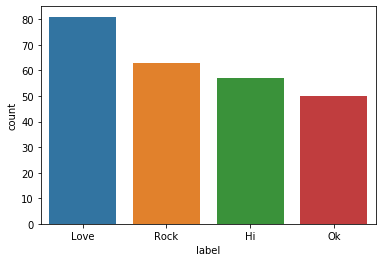

In [42]:
sns.countplot(df['label'])

In [44]:
# X = df.drop(labels='Label',axis=1)
X = df.drop(labels='label',axis=1)
# y = df['Label']
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True,stratify=df['label'])

Text(0.5, 1.0, 'label for test set')

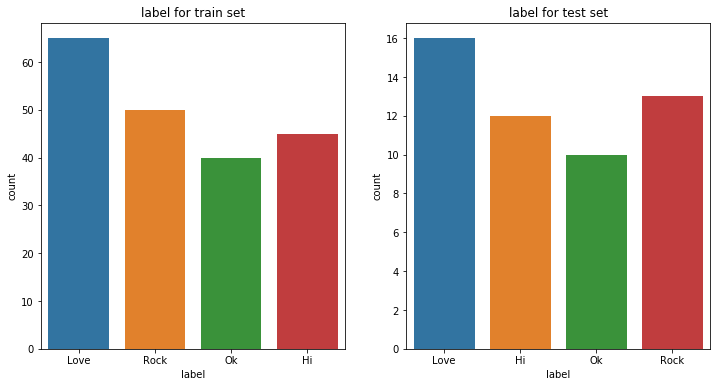

In [45]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
# plt.figure(figsize=(16,16))
sns.countplot(y_train,ax=ax[0])
ax[0].set_title("label for train set")
sns.countplot(y_test,ax=ax[1])
ax[1].set_title("label for test set")

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
models = []
models.append(('Decision tree' , DecisionTreeClassifier(random_state=0)))
models.append(('SVC' , SVC(random_state=0)))
models.append(('Logistic Regression' , LogisticRegression(random_state=0)))
models.append(('Random Forest' , RandomForestClassifier(random_state=0)))

for name,model in models:
    classifier = model
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f'Model {name} has {acc} accuracy')

Model Decision tree has 0.9803921568627451 accuracy
Model SVC has 1.0 accuracy
Model Logistic Regression has 1.0 accuracy
Model Random Forest has 1.0 accuracy


In [51]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9803921568627451

In [53]:
with open("hands_recognition_2.pkl",'wb') as f:
    pickle.dump(classifier,f)

In [54]:
import pickle
with open('hands_recognition_2.pkl', 'rb') as f:
    test_model = pickle.load(f)

In [59]:
y_pred2 = test_model.predict(X_test)

In [60]:
y_pred2

array(['Love', 'Love', 'Hi', 'Hi', 'Love', 'Love', 'Love', 'Hi', 'Love',
       'Ok', 'Rock', 'Rock', 'Rock', 'Love', 'Love', 'Ok', 'Rock', 'Ok',
       'Rock', 'Rock', 'Ok', 'Love', 'Love', 'Hi', 'Hi', 'Rock', 'Rock',
       'Love', 'Hi', 'Love', 'Love', 'Rock', 'Ok', 'Love', 'Hi', 'Ok',
       'Ok', 'Ok', 'Rock', 'Hi', 'Hi', 'Hi', 'Rock', 'Love', 'Rock', 'Hi',
       'Hi', 'Ok', 'Love', 'Hi', 'Rock'], dtype=object)